In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score, roc_auc_score, roc_curve, cohen_kappa_score, brier_score_loss
from sklearn.metrics import matthews_corrcoef

In [30]:
data = pd.read_csv("dat_mol_desc.csv")
#data

In [31]:
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
df

,BCUT2D_LOGPLOW,Chi2n,SlogP_VSA2,BCUT2D_CHGHI,BalabanJ,MolLogP,MinPartialCharge,BCUT2D_MRHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,...,fr_allylic_oxid,fr_ester,fr_Ndealkylation2,fr_guanido,fr_imidazole,fr_ArN,NumSaturatedCarbocycles,fr_Ar_NH,fr_oxime,Target
0,-2.274546,2.554432,29.129416,2.033926,2.282270,0.01970,-0.350047,5.932247,-2.026420,1.936628,...,0,0,0,0,0,0,0,0,0,0
1,-2.089187,2.424764,10.197364,1.980068,2.790967,0.91540,-0.306454,5.900450,-2.007470,2.169958,...,0,0,0,0,0,1,0,0,0,0
2,-2.071464,2.502112,14.095344,1.934891,2.909823,2.15050,-0.377659,5.510489,-2.104827,2.165116,...,0,0,0,0,0,0,0,0,0,1
3,-2.049546,2.271354,0.000000,2.299756,3.138261,2.57630,-0.397817,7.800718,-2.071232,2.314022,...,0,0,0,0,0,1,0,0,0,1
4,-2.708227,7.102951,77.633078,2.546546,1.803859,-0.16830,-0.462375,7.998386,-2.492032,2.405247,...,0,2,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,-1.844746,5.319801,11.713409,1.929004,2.846262,5.46000,-0.396377,4.484332,-2.021446,2.121415,...,0,0,0,0,0,0,0,0,0,0
2207,-2.614526,7.823123,70.792060,2.420235,1.734614,1.59550,-0.479668,5.874495,-2.418695,2.242286,...,0,1,0,0,0,0,0,0,0,0
2208,-1.703067,2.498274,5.106527,1.939654,2.913161,2.54540,-0.507312,5.872199,-1.972157,2.223777,...,0,0,0,0,0,0,0,0,0,1
2209,-2.528972,11.346034,45.296098,2.409472,1.871492,6.38812,-0.505325,6.872268,-2.394784,2.332933,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y= df.Target
X=df.drop('Target', axis=1)

In [33]:
cat_features=list(range(0,X.shape[1]))
#print(cat_features)

In [34]:
y_train = df.Target
x_train = df.drop('Target', axis=1)

In [35]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T

In [36]:
y_train.value_counts()

0    1109
1    1102
Name: Target, dtype: int64

In [37]:
#Read the validation set
v_test_data = pd.read_csv("val_mol_desc.csv")
v_test_data = pd.DataFrame(v_test_data)
v_test_data.shape

(367, 82)

In [38]:
Y_v_test_data = v_test_data.Target
X_v_test_data = v_test_data.drop('Target', axis=1)

In [39]:
# Normalize
#X_v_test_data = (X_v_test_data - np.min(X_v_test_data)) / (np.max(X_v_test_data) - np.min(X_v_test_data)).values
#X_v_test_data.shape

In [40]:
Y_v_test_data = v_test_data.Target
X_v_test_data =v_test_data.drop('Target', axis=1)

In [41]:
weights = {0:0.5, 1:0.5}

In [42]:
#For1024
#svm = SVC(C=1,kernel='rbf',probability=True,gamma=0.001, class_weight=weights)
#For2048, gamma=0.0001
#svm = SVC(C=8,kernel='rbf',probability=True,gamma=0.09125, class_weight=weights) classic performance1
#svm = SVC(C=8,kernel='rbf',probability=True,gamma=0.912, class_weight=weights)
#Things are improving
#svm = SVC(C=10,kernel='rbf',probability=True,gamma=0.05, class_weight=weights) 
#svm = SVC(C=10,kernel='rbf',probability=True,gamma=0.0110, class_weight=weights) # classific performance3
#For mol_desc
svm = SVC(C=30,kernel='rbf',probability=True,gamma=0.0000005,class_weight=weights)
#svm = SVC(kernel='rbf',probability=True)
svm.fit(x_train.T, y_train.T)  #.T

SVC(C=30, class_weight={0: 0.5, 1: 0.5}, gamma=5e-07, probability=True)

In [55]:
v_predictions = svm.predict(X_v_test_data)
acc_train=svm.score(x_train.T,y_train.T)*100
v_acc_test=svm.score(X_v_test_data, Y_v_test_data)*100
print(acc_train)
print(v_acc_test)

66.53098145635458
68.66485013623979


In [56]:
from sklearn.metrics import matthews_corrcoef
print('Accuracy:%0.3f'% v_acc_test)
tn, fp, fn, tp = confusion_matrix(Y_v_test_data, v_predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity:%0.3f'% sensitivity)
print('Specificity:%0.3f'% specificity)
ba = 0.5 * (sensitivity + specificity)
print('Balance accuracy:%0.3f'% ba)
mcc = matthews_corrcoef(Y_v_test_data, v_predictions)
#mcc = matthews_corrcoef(Y_test_data, v_predictions)
print('MCC: %0.3f'% mcc)
r_auc_score = roc_auc_score(Y_v_test_data, v_predictions)
#r_auc_score = roc_auc_score(Y_test_data, v_predictions)
print('AUC: %0.3f' % r_auc_score)
bloss = brier_score_loss(Y_v_test_data, v_predictions)
#bloss = brier_score_loss(Y_test_data, v_predictions)
print('Brier_loss: %0.3f' % bloss)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('False Postive rate: %0.3f' %FPR)
print('False Negative rate: %0.3f' %FNR)
print('Precision: %0.3f' %Precision)
print('Recall: %0.3f' %Recall)
f1=2*((Precision*Recall)/(Precision+Recall))
print('F1: %0.3f' %f1)
kappa = cohen_kappa_score(Y_v_test_data, v_predictions)
print('Kappa: %0.3f' %kappa)

Accuracy:68.665
Sensitivity:0.647
Specificity:0.706
Balance accuracy:0.676
MCC: 0.336
AUC: 0.676
Brier_loss: 0.313
False Postive rate: 0.294
False Negative rate: 0.353
Precision: 0.513
Recall: 0.647
F1: 0.572
Kappa: 0.330


In [57]:
cf =(confusion_matrix(Y_v_test_data, v_predictions))
print(classification_report(Y_v_test_data, v_predictions))

              precision    recall  f1-score   support

           0       0.81      0.71      0.75       248
           1       0.51      0.65      0.57       119

    accuracy                           0.69       367
   macro avg       0.66      0.68      0.66       367
weighted avg       0.71      0.69      0.69       367



<AxesSubplot:xlabel='Predicted Value', ylabel='True Value'>

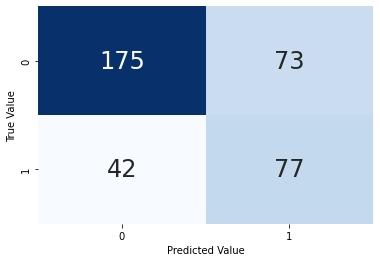

In [58]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [59]:
r_probs = [0 for _ in range(len(Y_v_test_data))]
svm_prob = svm.predict_proba(X_v_test_data)
svm_prob = svm_prob[:,1]
svm_prob_val=pd.DataFrame(svm_prob)

In [60]:
#svm_prob_val.to_csv('VAL_0_SV1024_probability_FP.csv')

In [61]:
r_probs = [0 for _ in range(len(Y_v_test_data))]
svm_prob = svm.predict_proba(X_v_test_data)
svm_prob = svm_prob[:,1]

In [62]:
#prediction_val=svm.predict(X_v_test_data)
#prediction_val

In [63]:
#prediction_val=pd.DataFrame(prediction_val)

In [64]:
#prediction_val.to_csv("label_val_1024_SVM.csv")

In [65]:
r_auc_score = roc_auc_score(Y_v_test_data, svm_prob)
r_auc_score_1 = roc_auc_score(Y_v_test_data,r_probs)
print(r_auc_score)
fpr, tpr, _ = roc_curve(Y_v_test_data, svm_prob)
rfpr, rtpr, _ = roc_curve(Y_v_test_data, r_probs)

0.695310382217403


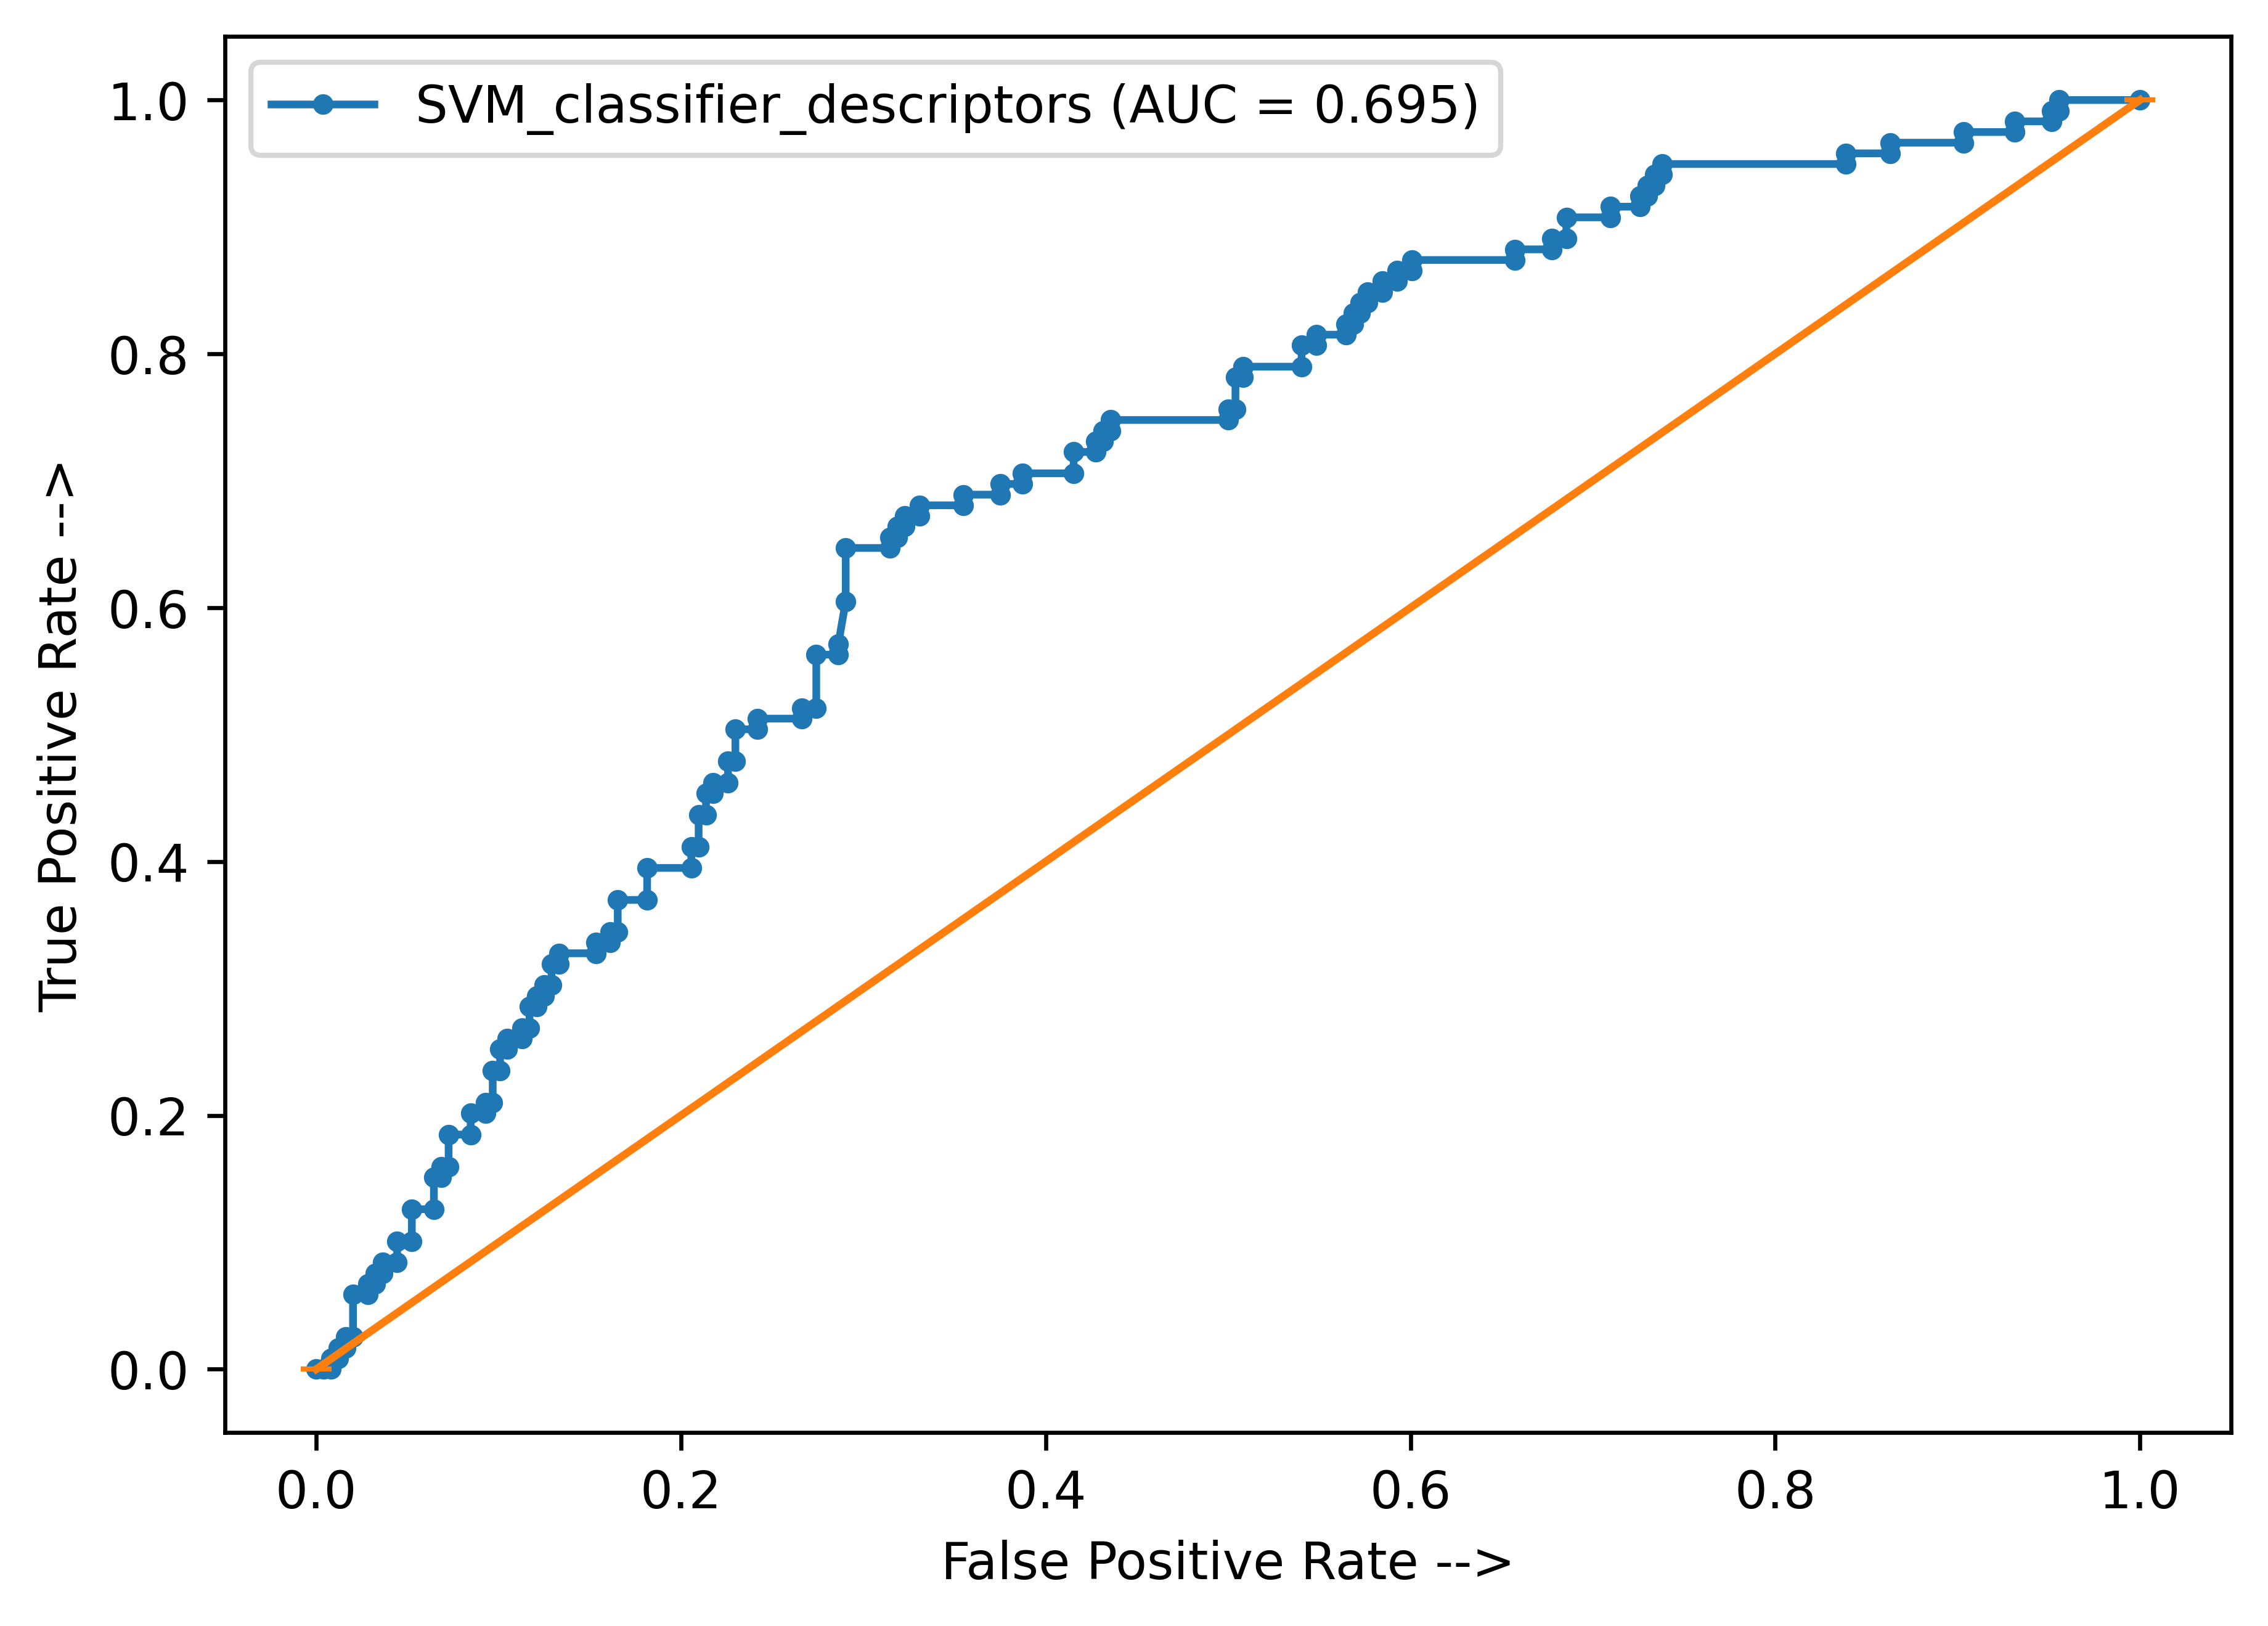

In [66]:
plt.figure(figsize=(7, 5), dpi=600)
plt.plot(fpr, tpr, marker='.', label='SVM_classifier_descriptors (AUC = %0.3f)' % r_auc_score)
plt.plot(rfpr, rtpr, marker='_' % r_auc_score_1)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()
#plt.savefig('SVM_AUC.png', dpi=600, bbox_inches='tight')

In [ ]:
#plt.figure(figsize=(10,6))
#plt.title("Predictions of RBF kernel with C=1 and Gamma=0.01", fontsize=18)
#plt.scatter(X_v_test_data.iloc[:, 0], X_v_test_data.iloc[:, 1], c=v_predictions, s=50, cmap='cool')
#plt(svm)

In [67]:
from sklearn.metrics import RocCurveDisplay

In [68]:
from scipy import interp
from sklearn.metrics import roc_curve,auc
cv = StratifiedKFold(n_splits=10,shuffle=False)

/tmp/ipykernel_12296/3138078315.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_12296/3138078315.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_12296/3138078315.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_12296/3138078315.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_12296/3138078315.py:13: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_12296/3138078315.py:13: DeprecationWarni

<Figure size 4200x3000 with 0 Axes>

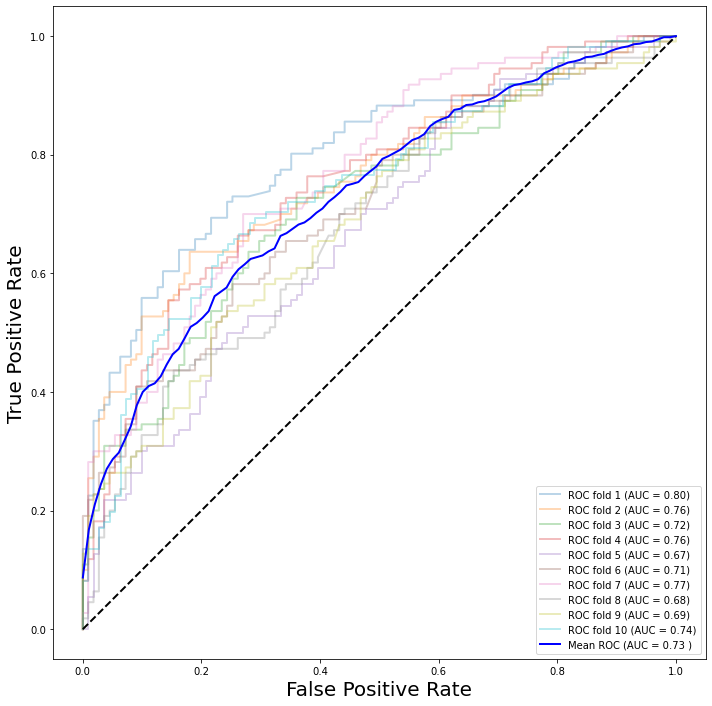

In [69]:
# plot k fold ROC
plt.figure(figsize=(7, 5), dpi=600)
x_train = x_train.T
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_train,y_train):
    prediction = svm.fit(x_train.iloc[train],y_train.iloc[train]).predict_proba(x_train.iloc[test])
    fpr, tpr, t = roc_curve(y_train.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.legend(loc="lower right")
plt.show()
#plt.savefig('CrossVal-AUC_CB_1024.png', dpi=600, bbox_inches='tight')

In [28]:
#Read external set
#external_data = pd.read_csv("cyclic_ind_rdkit_for_screening.csv")
#data_for_screening = pd.DataFrame(external_data)
#data_for_screening

In [70]:
#test external data
#test_prob = svm.predict_proba(data_for_screening)
#test_prob_F = pd.DataFrame(test_prob)
#test_prob_F.to_csv('cyclic_SVM_probability_desc.csv')

In [ ]:
##Y-randomization

In [ ]:
accuracy_list = []
mcc_list = []
for i in range(50):
    y_train = y_train.sample(frac=1, replace=False, random_state=i)
    svm.fit(x_train, y_train)
    print('Trained')
    scrmb_predictions = svm.predict(X_v_test_data)
    print(i)
    accuracy = roc_auc_score(Y_v_test_data, scrmb_predictions)
    print('scra_pred')
    accuracy_list.append(accuracy)
    mcc_v = matthews_corrcoef(Y_v_test_data, scrmb_predictions)
    mcc_list.append(mcc_v)
print(accuracy_list)

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
#print(mcc_list)
average = Average(accuracy_list)
  
# Printing average of the list
print("Average of the accuracy list =", round(average, 3))

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)
#print(mcc_list)
average = Average(mcc_list)
  
# Printing average of the list
print("Average of the mcc list =", round(average, 3))

In [ ]:
r_auc_score2 = roc_auc_score(Y_v_test_data, scrmb_predictions)
sns.set_style("white")
plt.figure(figsize = (20, 5), dpi=600) 
ax = sns.distplot(accuracy_list, color="green")
plt.axvline(r_auc_score, color="green")
plt.xlabel("AUC Score", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
ax.set(xlim=(0, 1))
#plt.savefig('CatBoost_scrambling_plot.png', dpi=600, bbox_inches='tight')

In [ ]:
mcc2 = matthews_corrcoef(Y_v_test_data, scrmb_predictions)
sns.set_style("white")
plt.figure(figsize = (20, 5), dpi=600) 
ax = sns.distplot(mcc_list, color="green")
plt.axvline(mcc, color="green")
plt.xlabel("MCC Score", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
ax.set(xlim=(0, 1))
#plt.savefig('CB_MCC_plot.png', dpi=600, bbox_inches='tight')

In [ ]:
external_data = pd.read_csv("cyclic_ind_rdkit_for_screening.csv")
data_for_screening = pd.DataFrame(external_data)

In [ ]:
test_prob = svm.predict_proba(data_for_screening)
test_prob_F = pd.DataFrame(test_prob)
test_prob_F.to_csv('SVM_desc_probability_FP.csv')